In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [2]:
# Questions of focus:
# Q41: have you taken/are taking a CS class at UM
# Q46_1: plan on taking at least one CS class in future (7 max)
# Q47: Have you registered for at least one CS class next term?

In [3]:
# Read in cleaned data

# General group definitions:
# Group 1 = Survey 1 taken in Fall/Survey 2 taken in Winter
# Group 2a = Survey 1 taken in Winter/Survey 2 taken following Fall
# Group 2b = Survey 1 taken in Fall/Survey 2 taken following Fall 
# Group 3a = Survey 1 taken Winter 2018/Survey 2 taken Fall 2020 (group 3 exclusive to 2018 data)
# Group 3b = Survey 1 taken Fall 2018/Survey 2 taken Fall 2020 (group 3 exclusive to 2018 data)
# some groups are omitted, either because they contain no data, or data has not yet been collected

G1S1_2018 = pd.read_csv('../CleanedData/2018Group1Survey1.csv')
G1S2_2018 = pd.read_csv('../CleanedData/2018Group1Survey2.csv')
G2aS1_2018 = pd.read_csv('../CleanedData/2018Group2aSurvey1.csv')
G2aS2_2018 = pd.read_csv('../CleanedData/2018Group2aSurvey2.csv')
G2bS1_2018 = pd.read_csv('../CleanedData/2018Group2bSurvey1.csv')
G2bS2_2018 = pd.read_csv('../CleanedData/2018Group2bSurvey2.csv')
G3aS1_2018 = pd.read_csv('../CleanedData/2018Group3aSurvey1.csv')
G3aS2_2018 = pd.read_csv('../CleanedData/2018Group3aSurvey2.csv')
G3bS1_2018 = pd.read_csv('../CleanedData/2018Group3bSurvey1.csv')
G3bS2_2018 = pd.read_csv('../CleanedData/2018Group3bSurvey2.csv')
G1S1_2019 = pd.read_csv('../CleanedData/2019Group1Survey1.csv')
G1S2_2019 = pd.read_csv('../CleanedData/2019Group1Survey2.csv')
G2bS1_2019 = pd.read_csv('../CleanedData/2019Group2bSurvey1.csv')
G2bS2_2019 = pd.read_csv('../CleanedData/2019Group2bSurvey2.csv')
G1S1_2020 = pd.read_csv('../CleanedData/2020Group1Survey1.csv')
G1S2_2020 = pd.read_csv('../CleanedData/2020Group1Survey2.csv')

pd.set_option('max_columns', None)

In [4]:
# Q47: Have you registered for at least one CS class next term?

In [5]:
# Print plots to compare test/control: Q47?
                        # df      df       str
def plotCSRegistration(survey1, survey2, grouping):
    
    title = 'Q47: Have you registered for at least one CS class next term?\n(' + grouping + ')'

    testS1 = survey1[survey1.Group == 'Test']
    conS1 = survey1[survey1.Group == 'Control']
    testS2 = survey2[survey2.Group == 'Test']
    conS2 = survey2[survey2.Group == 'Control']
    
    total_testS1 = len(testS1) if (len(testS1) > 0) else 1
    total_conS1 = len(conS1) if (len(conS1) > 0) else 1
    total_testS2 = len(testS2) if (len(testS2) > 0) else 1
    total_conS2 = len(conS2) if (len(conS2) > 0) else 1

    # Count values
    testS1_numYes = len(testS1[testS1.Q47 == 'Yes'])
    testS1_numNo = len(testS1[testS1.Q47 == 'No'])
    testS1_numNotReg = len(testS1[testS1.Q47 == 'I have not registered for next term yet.'])
    conS1_numYes = len(conS1[conS1.Q47 == 'Yes'])
    conS1_numNo = len(conS1[conS1.Q47 == 'No'])
    conS1_numNotReg = len(conS1[conS1.Q47 == 'I have not registered for next term yet.'])
    
    testS2_numYes = len(testS2[testS2.Q47 == 'Yes'])
    testS2_numNo = len(testS2[testS2.Q47 == 'No'])
    testS2_numNotReg = len(testS2[testS2.Q47 == 'I have not registered for next term yet.'])
    conS2_numYes = len(conS2[conS2.Q47 == 'Yes'])
    conS2_numNo = len(conS2[conS2.Q47 == 'No'])
    conS2_numNotReg = len(conS2[conS2.Q47 == 'I have not registered for next term yet.'])

    # Get percentages
    testS1_perYes = testS1_numYes / total_testS1 * 100
    testS1_perNo = testS1_numNo / total_testS1 * 100
    testS1_perNotReg = testS1_numNotReg / total_testS1 * 100
    conS1_perYes = conS1_numYes / total_conS1 * 100
    conS1_perNo = conS1_numNo / total_conS1 * 100
    conS1_perNotReg = conS1_numNotReg / total_conS1 * 100
    
    testS2_perYes = testS2_numYes / total_testS2 * 100
    testS2_perNo = testS2_numNo / total_testS2 * 100
    testS2_perNotReg = testS2_numNotReg / total_testS2 * 100
    conS2_perYes = conS2_numYes / total_conS2 * 100
    conS2_perNo = conS2_numNo / total_conS2 * 100
    conS2_perNotReg = conS2_numNotReg / total_conS2 * 100
    
    S1Data = [[testS1_perYes, testS1_perNo, testS1_perNotReg],
              [conS1_perYes, conS1_perNo, conS1_perNotReg]]

    S2Data = [[testS2_perYes, testS2_perNo, testS2_perNotReg],
              [conS2_perYes, conS2_perNo, conS2_perNotReg]]

    # Data for Altair plot
    print('S1 Data: ', S1Data, '\n')
    print('S2 Data: ', S2Data)
    
    # Plot
    
    # Get max value to set y limit
    max_val = max([testS1_perYes, testS1_perNo, testS1_perNotReg,
                  conS1_perYes, conS1_perNo, conS1_perNotReg, 
                  testS2_perYes, testS2_perNo, testS2_perNotReg, 
                  conS2_perYes, conS2_perNo, conS2_perNotReg])
    
    X = np.arange(3)
    fig, ax = plt.subplots(1, 2)
    fig.suptitle(title, x=1, y=1.15)

    ax[0] = fig.add_axes([0,0,1,1])
    ax[0].set_ylim([0,max_val+2])
    ax[0].bar(X + 0.0, S1Data[0], color = 'r', width = 0.2, label = 'Test')
    ax[0].bar(X + 0.2, S1Data[1], color = 'b', width = 0.2, label = 'Control')
    ax[0].set_title('Survey 1')
    ax[0].set_xticks(X + 0.2)
    ax[0].set_xticklabels(['Yes', 'No', 'Have not registered'])
    ax[0].set_ylabel('% Students')
    ax[0].legend(loc='best')

    ax[1] = fig.add_axes([1.1,0,1,1])
    ax[1].set_ylim([0,max_val+2])
    ax[1].bar(X + 0.0, S2Data[0], color = 'r', width = 0.2, label = 'Test')
    ax[1].bar(X + 0.2, S2Data[1], color = 'b', width = 0.2, label = 'Control')
    ax[1].set_title('Survey 2')
    ax[1].set_xticks(X + 0.2)
    ax[1].set_xticklabels(['Yes', 'No', 'Have not registered'])
    ax[1].set_ylabel('% Students')
    ax[1].legend(loc='best')

In [6]:
############################## broken up by survey ##############################

In [7]:
S1 = pd.concat([G1S1_2018, G2aS1_2018, G2bS1_2018, G3aS1_2018, G3bS1_2018, G1S1_2019, G2bS1_2019, G1S1_2020])
S1.to_csv('../CleanedData/S1_all.csv', index=False, header=True)
S2 = pd.concat([G1S2_2018, G2aS2_2018, G2bS2_2018, G3aS2_2018, G3bS2_2018, G1S2_2019, G2bS2_2019, G1S2_2020])
S2.to_csv('../CleanedData/S2_all.csv', index=False, header=True)

S1 Data:  [[14.492753623188406, 10.144927536231885, 66.66666666666666], [7.258064516129033, 10.483870967741936, 82.25806451612904]] 

S2 Data:  [[24.637681159420293, 34.78260869565217, 20.28985507246377], [30.64516129032258, 33.87096774193548, 29.838709677419356]]


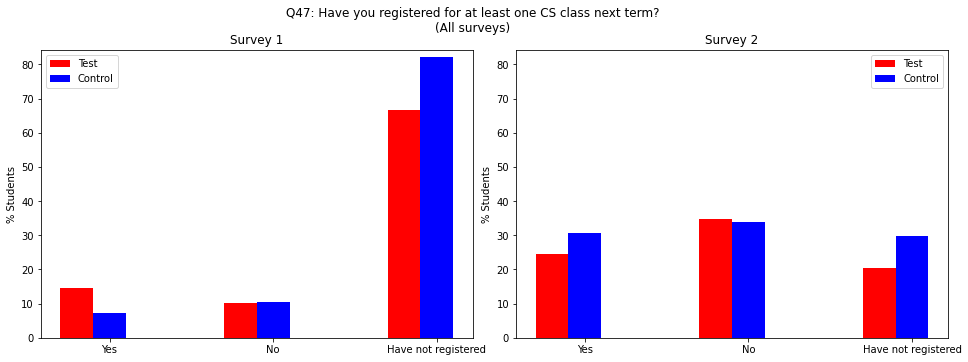

In [8]:
plotCSRegistration(S1, S2, 'All surveys')

In [9]:
# Altair plot

S1_47 = pd.DataFrame({'Group': ['Test','Test','Test','Control','Control','Control'],
                        'Response': ['Yes','No','Have not registered',
                                   'Yes','No','Have not registered'],
                       'Percent of Students': [14.492753623188406, 10.144927536231885, 66.66666666666666,
                                              7.258064516129033, 10.483870967741936, 82.25806451612904]})

S2_47 = pd.DataFrame({'Group': ['Test','Test','Test','Control','Control','Control'],
                        'Response': ['Yes','No','Have not registered',
                                   'Yes','No','Have not registered'],
                       'Percent of Students': [24.637681159420293, 34.78260869565217, 20.28985507246377,
                                              30.64516129032258, 33.87096774193548, 29.838709677419356]})

y_min = 0
y_max = 90

selection = alt.selection_multi(fields=['Group'], bind='legend')

chart1 = alt.Chart(S1_47).mark_bar().encode(
    column='Response',
    x='Group',
    y=alt.Y('Percent of Students', scale=alt.Scale(domain=[y_min, y_max])),
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#063e99','#DCB103'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.05))
).add_selection(selection).properties(title='Survey 1')


chart2 = alt.Chart(S2_47).mark_bar().encode(
    column='Response',
    x='Group',
    y=alt.Y('Percent of Students', scale=alt.Scale(domain=[y_min, y_max])),
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#063e99','#DCB103'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.05))
).add_selection(selection).properties(title='Survey 2+')

chart1 | chart2

alt.HConcatChart(...)

In [10]:
############################## broken up by when surveys taken ##############################
                    # survey 1 fall/survey 2 winter
                    # survey 1 winter/survey 2 fall
                    # survey 1 fall/survey 2 following fall
                    # (regardless of year)

S1_Fall = pd.concat([G1S1_2018, G1S1_2019, G1S1_2020])
S2_Win = pd.concat([G1S2_2018, G1S2_2019, G1S2_2020])

S1_Win = pd.concat([G2aS1_2018, G3aS1_2018])
S2_Fall = pd.concat([G2aS2_2018, G3aS2_2018])

S1_bothFall = pd.concat([G2bS1_2018, G3bS1_2018, G2bS1_2019])
S2_bothFall = pd.concat([G2bS2_2018, G3bS2_2018, G2bS2_2019])

# S1_Fall.to_csv('../CleanedData/S1_Fall.csv', index=True, header=True)
# S2_Win.to_csv('../CleanedData/S2_Win.csv', index=True, header=True)

# S1_Win.to_csv('../CleanedData/S1_Win.csv', index=True, header=True)
# S2_Fall.to_csv('../CleanedData/S2_Fall.csv', index=True, header=True)

# S1_bothFall.to_csv('../CleanedData/S1_bothFall.csv', index=True, header=True)
# S2_bothFall.to_csv('../CleanedData/S2_bothFall.csv', index=True, header=True)

S1 Data:  [[16.129032258064516, 9.67741935483871, 74.19354838709677], [7.936507936507936, 12.698412698412698, 79.36507936507937]] 

S2 Data:  [[32.25806451612903, 48.38709677419355, 12.903225806451612], [38.095238095238095, 38.095238095238095, 15.873015873015872]]


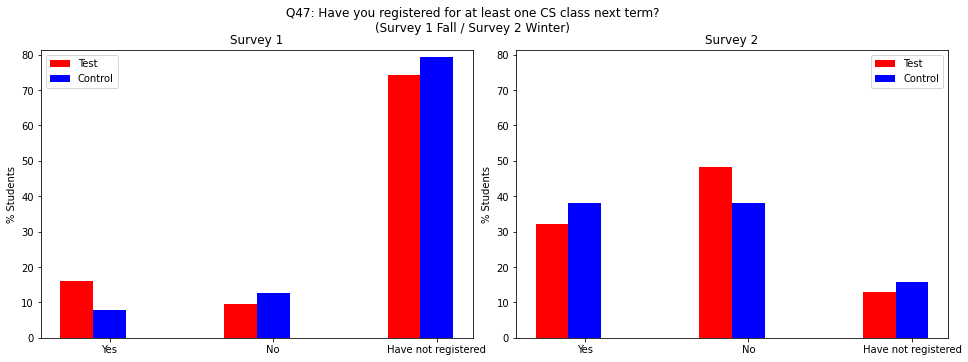

In [11]:
plotCSRegistration(S1_Fall, S2_Win, 'Survey 1 Fall / Survey 2 Winter')

S1 Data:  [[50.0, 0.0, 0.0], [0.0, 0.0, 0.0]] 

S2 Data:  [[50.0, 0.0, 0.0], [0.0, 0.0, 0.0]]


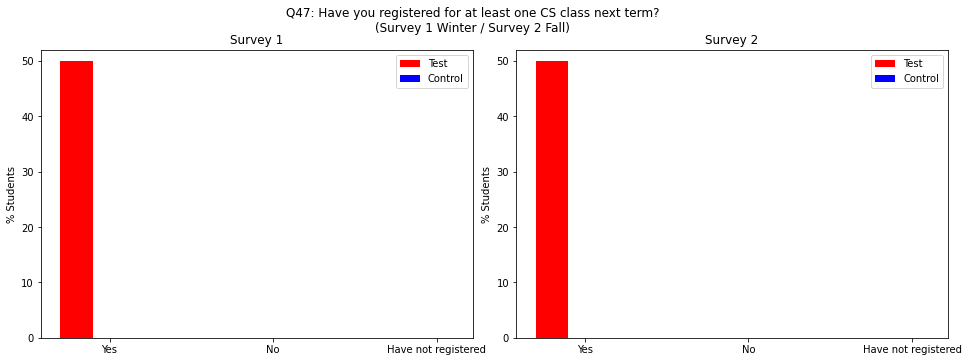

In [12]:
plotCSRegistration(S1_Win, S2_Fall, 'Survey 1 Winter / Survey 2 Fall')

S1 Data:  [[8.823529411764707, 11.76470588235294, 67.64705882352942], [6.557377049180328, 8.19672131147541, 85.24590163934425]] 

S2 Data:  [[14.705882352941178, 26.47058823529412, 29.411764705882355], [22.950819672131146, 29.508196721311474, 44.26229508196721]]


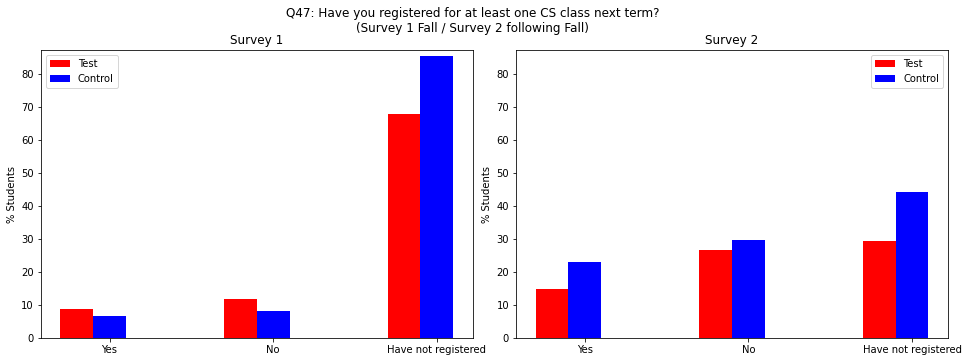

In [13]:
plotCSRegistration(S1_bothFall, S2_bothFall, 'Survey 1 Fall / Survey 2 following Fall')

In [14]:
############################## broken up by group and year ##############################

S1 Data:  [[30.0, 10.0, 60.0], [4.166666666666666, 8.333333333333332, 87.5]] 

S2 Data:  [[30.0, 60.0, 0.0], [41.66666666666667, 54.166666666666664, 0.0]]


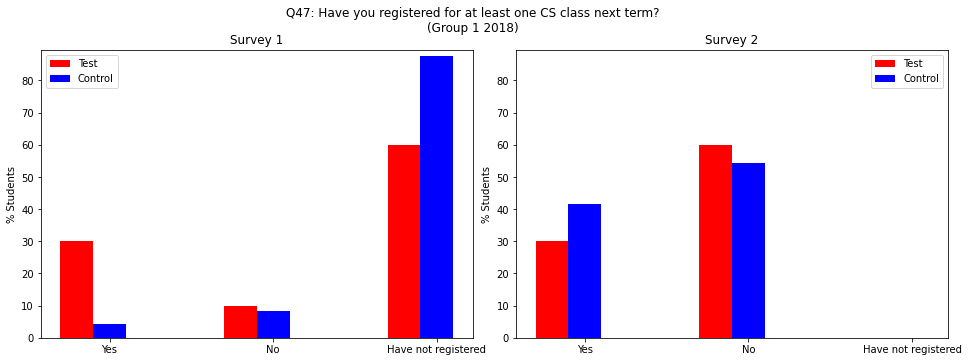

In [15]:
plotCSRegistration(G1S1_2018, G1S2_2018, 'Group 1 2018')

S1 Data:  [[50.0, 0.0, 0.0], [0.0, 0.0, 0.0]] 

S2 Data:  [[50.0, 0.0, 0.0], [0.0, 0.0, 0.0]]


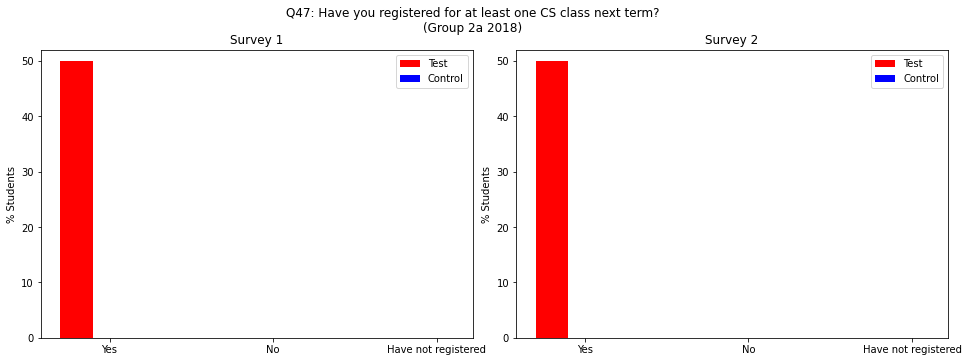

In [16]:
plotCSRegistration(G2aS1_2018, G2aS2_2018, 'Group 2a 2018')

S1 Data:  [[9.090909090909092, 9.090909090909092, 63.63636363636363], [4.545454545454546, 0.0, 95.45454545454545]] 

S2 Data:  [[18.181818181818183, 18.181818181818183, 36.36363636363637], [4.545454545454546, 36.36363636363637, 59.09090909090909]]


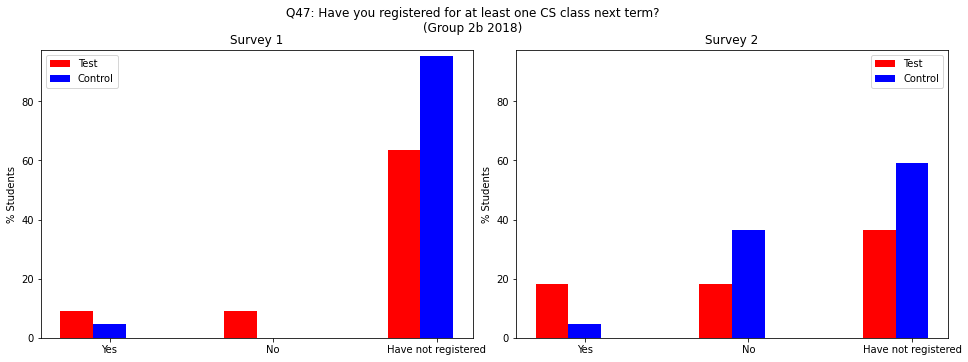

In [17]:
plotCSRegistration(G2bS1_2018, G2bS2_2018, 'Group 2b 2018')

S1 Data:  [[50.0, 0.0, 0.0], [0.0, 0.0, 0.0]] 

S2 Data:  [[50.0, 0.0, 0.0], [0.0, 0.0, 0.0]]


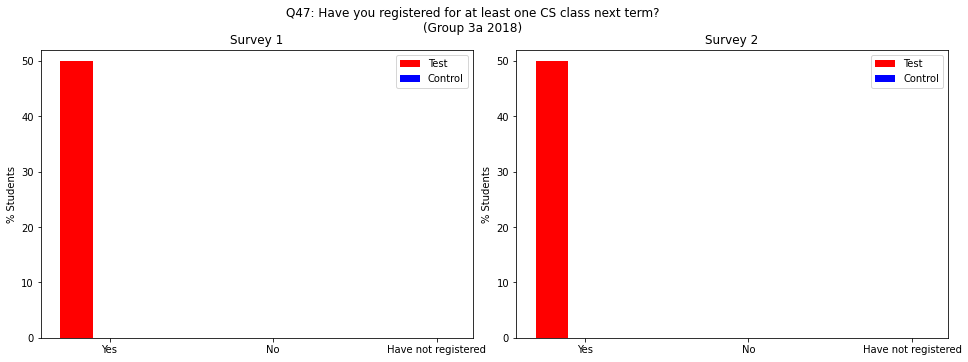

In [18]:
plotCSRegistration(G3aS1_2018, G3aS2_2018, 'Group 3a 2018')

S1 Data:  [[16.666666666666664, 8.333333333333332, 58.333333333333336], [10.526315789473683, 5.263157894736842, 84.21052631578947]] 

S2 Data:  [[16.666666666666664, 33.33333333333333, 16.666666666666664], [15.789473684210526, 31.57894736842105, 42.10526315789473]]


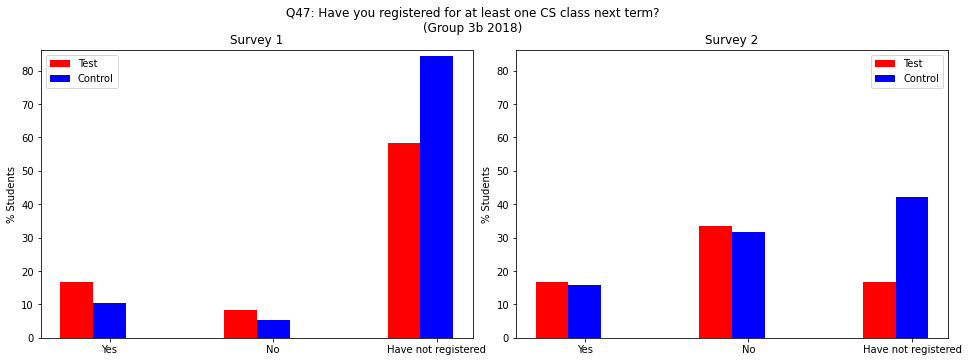

In [19]:
plotCSRegistration(G3bS1_2018, G3bS2_2018, 'Group 3b 2018')

S1 Data:  [[6.666666666666667, 13.333333333333334, 80.0], [9.523809523809524, 14.285714285714285, 76.19047619047619]] 

S2 Data:  [[33.33333333333333, 60.0, 0.0], [61.904761904761905, 33.33333333333333, 0.0]]


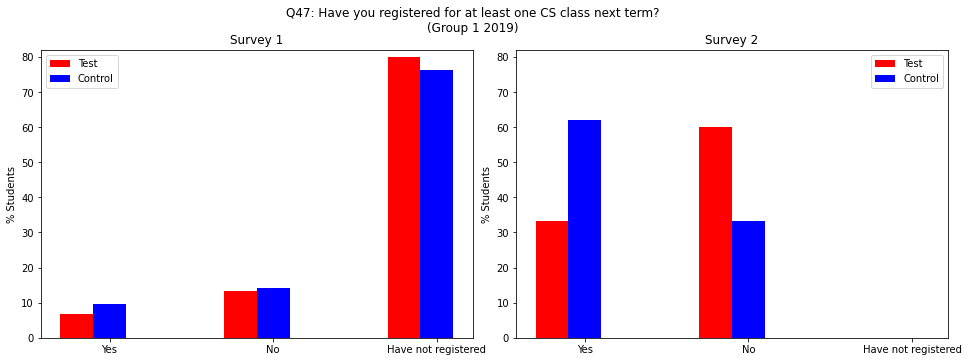

In [20]:
plotCSRegistration(G1S1_2019, G1S2_2019, 'Group 1 2019')

S1 Data:  [[0.0, 18.181818181818183, 81.81818181818183], [5.0, 20.0, 75.0]] 

S2 Data:  [[9.090909090909092, 27.27272727272727, 36.36363636363637], [50.0, 20.0, 30.0]]


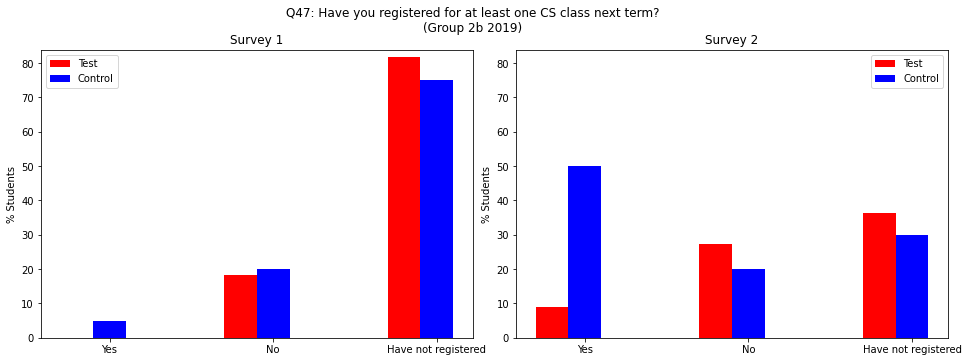

In [21]:
plotCSRegistration(G2bS1_2019, G2bS2_2019, 'Group 2b 2019')

S1 Data:  [[16.666666666666664, 0.0, 83.33333333333334], [11.11111111111111, 16.666666666666664, 72.22222222222221]] 

S2 Data:  [[33.33333333333333, 0.0, 66.66666666666666], [5.555555555555555, 22.22222222222222, 55.55555555555556]]


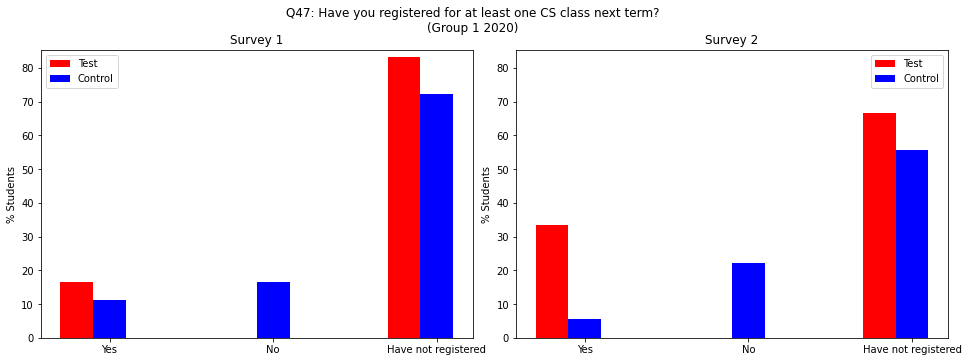

In [22]:
plotCSRegistration(G1S1_2020, G1S2_2020, 'Group 1 2020')

In [23]:
#Q46_1: (Scale 0-7) I plan on taking at least one CS class in the future.

In [24]:
# Print plots to compare test/control: Q46_1

                # df        df       str
def plotCSPlans(survey1, survey2, grouping):
    
    title = 'Q46_1: (Scale 0-7) I plan on taking at least one CS class in the future.\n(' + grouping + ')'

    testS1 = survey1[survey1.Group == 'Test']
    testS2 = survey2[survey2.Group == 'Test']
    conS1 = survey1[survey1.Group == 'Control']
    conS2 = survey2[survey2.Group == 'Control']
    
    total_testS1 = len(testS1) if (len(testS1) > 0) else 1
    total_conS1 = len(conS1) if (len(conS1) > 0) else 1
    total_testS2 = len(testS2) if (len(testS2) > 0) else 1
    total_conS2 = len(conS2) if (len(conS2) > 0) else 1

    # Create dictionaries of value counts
    tS1Dict = testS1['Q46_1'].value_counts().to_dict()
    cS1Dict = conS1['Q46_1'].value_counts().to_dict()
    tS2Dict = testS2['Q46_1'].value_counts().to_dict()
    cS2Dict = conS2['Q46_1'].value_counts().to_dict()

    # Check dictionaries have proper keys
    dicts = [tS1Dict, cS1Dict, tS2Dict, cS2Dict]
    key_list = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
    for i in range(len(dicts)):
        for j in range(len(key_list)):
            if key_list[j] not in dicts[i]:
                dicts[i][key_list[j]] = 0

    # Get percentages of test and control
    S1Data = [[tS1Dict[0.0] / total_testS1 * 100, tS1Dict[1.0] / total_testS1 * 100,
               tS1Dict[2.0] / total_testS1 * 100, tS1Dict[3.0] / total_testS1 * 100,
               tS1Dict[4.0] / total_testS1 * 100, tS1Dict[5.0] / total_testS1 * 100,
               tS1Dict[6.0] / total_testS1 * 100, tS1Dict[7.0] / total_testS1 * 100],
              [cS1Dict[0.0] / total_conS1 * 100, cS1Dict[1.0] / total_conS1 * 100,
               cS1Dict[2.0] / total_conS1 * 100, cS1Dict[3.0] / total_conS1 * 100,
               cS1Dict[4.0] / total_conS1 * 100, cS1Dict[5.0] / total_conS1 * 100,
                cS1Dict[6.0] / total_conS1 * 100, cS1Dict[7.0] / total_conS1 * 100]]
    S2Data = [[tS2Dict[0.0] / total_testS2 * 100, tS2Dict[1.0] / total_testS2 * 100,
               tS2Dict[2.0] / total_testS2 * 100, tS2Dict[3.0] / total_testS2 * 100,
               tS2Dict[4.0] / total_testS2 * 100, tS2Dict[5.0] / total_testS2 * 100,
               tS2Dict[6.0] / total_testS2 * 100, tS2Dict[7.0] / total_testS2 * 100],
               [cS2Dict[0.0] / total_conS2 * 100, cS2Dict[1.0] / total_conS2 * 100,
                cS2Dict[2.0] / total_conS2 * 100, cS2Dict[3.0] / total_conS2 * 100,
                cS2Dict[4.0] / total_conS2 * 100, cS2Dict[5.0] / total_conS2 * 100,
                cS2Dict[6.0] / total_conS2 * 100, cS2Dict[7.0] / total_conS2 * 100]]

    # Data for Altair plot
    print('S1 Data: ', S1Data, '\n')
    print('S2 Data: ', S2Data)
    
    # Plot
    
    # Get max value to set y limit
    max_val = max([max(tS1Dict.values()) / total_testS1 * 100, max(cS1Dict.values()) / total_conS1 * 100, 
                  max(tS2Dict.values()) / total_testS2 * 100, max(cS2Dict.values()) / total_conS2 * 100])
    
    X = np.arange(8)
    fig, ax = plt.subplots(1,2, constrained_layout=True)
    fig.suptitle(title, x=1, y=1.15)

    # survey 1
    ax[0] = fig.add_axes([0,0,1,1])
    ax[0].set_ylim([0,max_val+2])
    ax[0].bar(X + 0.0, S1Data[0], color = 'r', width = 0.2, label = 'Test')
    ax[0].bar(X + 0.2, S1Data[1], color = 'b', width = 0.2, label = 'Control')
    ax[0].set_title('Survey 1')
    ax[0].set_xticks(X + 0.2)
    ax[0].set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7'])
    ax[0].set_ylabel('% Students')
    ax[0].legend(loc='best')

    # survey 2
    ax[1] = fig.add_axes([1.1,0,1,1])
    ax[1].set_ylim([0,max_val+2])
    ax[1].bar(X + 0.0, S2Data[0], color = 'r', width = 0.2, label = 'Test')
    ax[1].bar(X + 0.2, S2Data[1], color = 'b', width = 0.2, label = 'Control')
    ax[1].set_title('Survey 2')
    ax[1].set_xticks(X + 0.2)
    ax[1].set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7'])
    ax[1].set_ylabel('% Students')
    ax[1].legend(loc='upper left')


S1 Data:  [[1.4492753623188406, 18.84057971014493, 4.3478260869565215, 5.797101449275362, 7.246376811594203, 13.043478260869565, 8.695652173913043, 31.88405797101449], [0.0, 2.4193548387096775, 9.67741935483871, 6.451612903225806, 4.032258064516129, 13.709677419354838, 9.67741935483871, 53.2258064516129]] 

S2 Data:  [[5.797101449275362, 8.695652173913043, 2.898550724637681, 5.797101449275362, 8.695652173913043, 4.3478260869565215, 1.4492753623188406, 39.130434782608695], [4.032258064516129, 10.483870967741936, 5.64516129032258, 2.4193548387096775, 11.29032258064516, 4.838709677419355, 4.032258064516129, 47.58064516129033]]


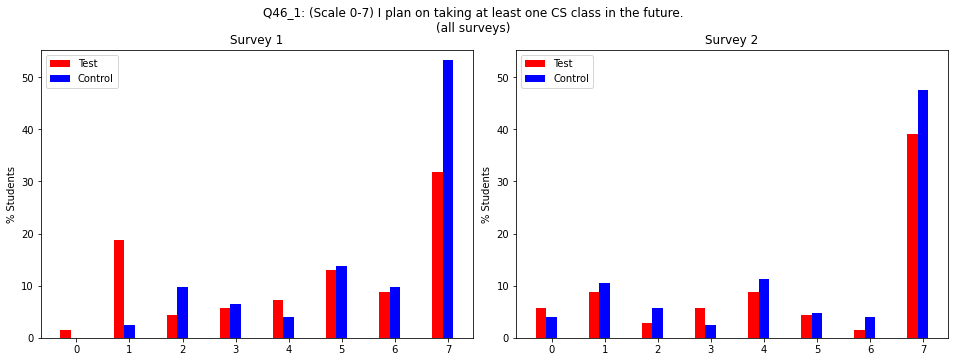

In [25]:
plotCSPlans(S1, S2, 'all surveys')

In [26]:
# Altair plot

S1_46_1 = pd.DataFrame({'Group': ['Test','Test','Test','Test','Test','Test','Test','Test',
                                  'Control','Control','Control','Control','Control','Control','Control','Control'],
                        'Ranking': ['0','1','2','3','4','5','6','7',
                                   '0','1','2','3','4','5','6','7'],
                       'Percent of Students': [1.4492753623188406, 18.84057971014493, 4.3478260869565215, 5.797101449275362, 7.246376811594203, 13.043478260869565, 8.695652173913043, 31.88405797101449,
                                              0.0, 2.4193548387096775, 9.67741935483871, 6.451612903225806, 4.032258064516129, 13.709677419354838, 9.67741935483871, 53.2258064516129]})

S2_46_1 = pd.DataFrame({'Group': ['Test','Test','Test','Test','Test','Test','Test','Test',
                                  'Control','Control','Control','Control','Control','Control','Control','Control'],
                        'Ranking': ['0','1','2','3','4','5','6','7',
                                   '0','1','2','3','4','5','6','7'],
                       'Percent of Students': [5.797101449275362, 8.695652173913043, 2.898550724637681, 5.797101449275362, 8.695652173913043, 4.3478260869565215, 1.4492753623188406, 39.130434782608695,
                                              4.032258064516129, 10.483870967741936, 5.64516129032258, 2.4193548387096775, 11.29032258064516, 4.838709677419355, 4.032258064516129, 47.58064516129033]})

y_min = 0
y_max = 60

selection = alt.selection_multi(fields=['Group'], bind='legend')

chart1 = alt.Chart(S1_46_1).mark_bar().encode(
    column='Ranking',
    x='Group',
    y=alt.Y('Percent of Students', scale=alt.Scale(domain=[y_min, y_max])),
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#063e99','#DCB103'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.05))
).add_selection(selection).properties(title='Survey 1')


chart2 = alt.Chart(S2_46_1).mark_bar().encode(
    column='Ranking',
    x='Group',
    y=alt.Y('Percent of Students', scale=alt.Scale(domain=[y_min, y_max])),
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#063e99','#DCB103'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.05))
).add_selection(selection).properties(title='Survey 2+')

chart1 | chart2

alt.HConcatChart(...)

S1 Data:  [[3.225806451612903, 19.35483870967742, 3.225806451612903, 3.225806451612903, 9.67741935483871, 12.903225806451612, 9.67741935483871, 38.70967741935484], [0.0, 1.5873015873015872, 7.936507936507936, 4.761904761904762, 4.761904761904762, 14.285714285714285, 9.523809523809524, 55.55555555555556]] 

S2 Data:  [[6.451612903225806, 6.451612903225806, 6.451612903225806, 6.451612903225806, 9.67741935483871, 9.67741935483871, 0.0, 41.935483870967744], [4.761904761904762, 6.349206349206349, 3.1746031746031744, 1.5873015873015872, 11.11111111111111, 3.1746031746031744, 6.349206349206349, 52.38095238095239]]


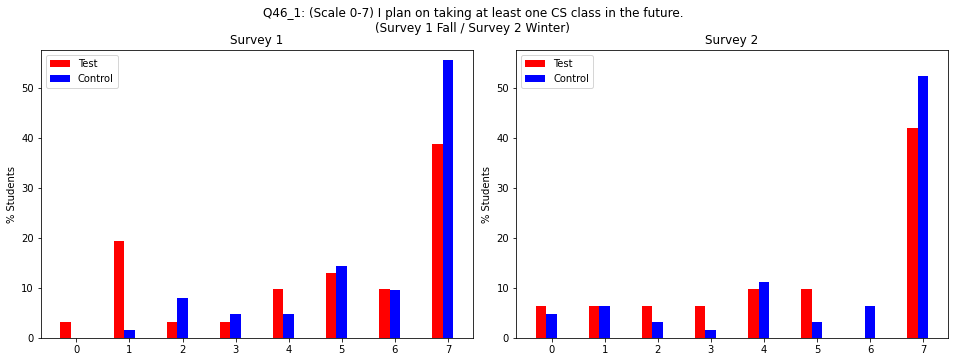

In [27]:
plotCSPlans(S1_Fall, S2_Win, 'Survey 1 Fall / Survey 2 Winter')

S1 Data:  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]] 

S2 Data:  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


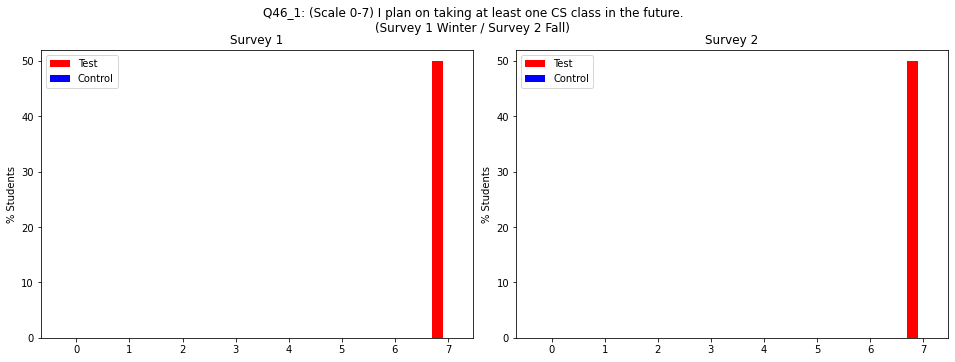

In [28]:
plotCSPlans(S1_Win, S2_Fall, 'Survey 1 Winter / Survey 2 Fall')

S1 Data:  [[0.0, 20.588235294117645, 5.88235294117647, 8.823529411764707, 5.88235294117647, 14.705882352941178, 8.823529411764707, 23.52941176470588], [0.0, 3.278688524590164, 11.475409836065573, 8.19672131147541, 3.278688524590164, 13.114754098360656, 9.836065573770492, 50.81967213114754]] 

S2 Data:  [[5.88235294117647, 11.76470588235294, 0.0, 5.88235294117647, 8.823529411764707, 0.0, 2.941176470588235, 35.294117647058826], [3.278688524590164, 14.754098360655737, 8.19672131147541, 3.278688524590164, 11.475409836065573, 6.557377049180328, 1.639344262295082, 42.62295081967213]]


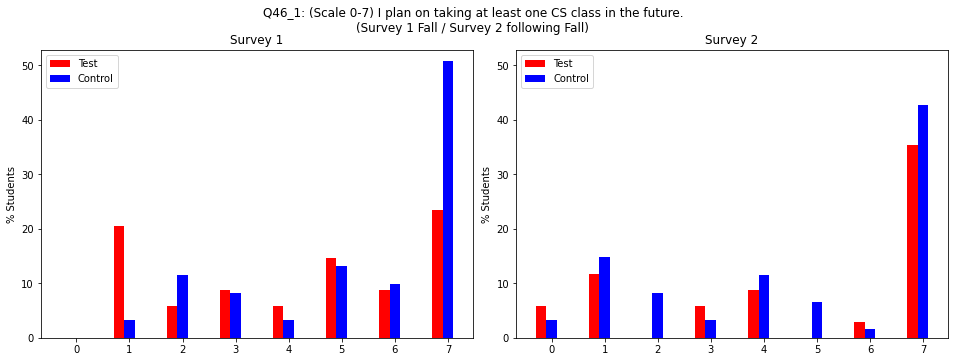

In [29]:
plotCSPlans(S1_bothFall, S2_bothFall, 'Survey 1 Fall / Survey 2 following Fall')